# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saquarema
Processing Record 2 of Set 1 | gushikawa
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | iberia
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | shimoda
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | la ronge
Processing Record 10 of Set 1 | corinto
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | portland
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | laguna
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | nikolskoye
Processing R

Processing Record 38 of Set 4 | rajshahi
Processing Record 39 of Set 4 | ati
Processing Record 40 of Set 4 | uwajima
Processing Record 41 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | bismarck
Processing Record 44 of Set 4 | hay river
Processing Record 45 of Set 4 | almaznyy
Processing Record 46 of Set 4 | sorong
Processing Record 47 of Set 4 | cayenne
Processing Record 48 of Set 4 | lompoc
Processing Record 49 of Set 4 | isangel
Processing Record 0 of Set 5 | codrington
Processing Record 1 of Set 5 | khilchipur
Processing Record 2 of Set 5 | matara
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | ordynskoye
Processing Record 5 of Set 5 | bethel
Processing Record 6 of Set 5 | isla mujeres
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 5 | cape town
Processing Record 10 of Set 5 | puerto narino
Process

Processing Record 28 of Set 8 | vostok
Processing Record 29 of Set 8 | dwarka
Processing Record 30 of Set 8 | bell ville
Processing Record 31 of Set 8 | san ramon
Processing Record 32 of Set 8 | saint george
Processing Record 33 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 34 of Set 8 | uni
Processing Record 35 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 8 | buala
Processing Record 37 of Set 8 | zyryanovsk
Processing Record 38 of Set 8 | nanortalik
Processing Record 39 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 8 | kyzyl-suu
Processing Record 41 of Set 8 | matinha
Processing Record 42 of Set 8 | laje
Processing Record 43 of Set 8 | namatanai
Processing Record 44 of Set 8 | saryozek
Processing Record 45 of Set 8 | ouricuri
Processing Record 46 of Set 8 | paamiut
Processing Record 47 of Set 8 | onda
Processing Record 48 of Set 8 | maralal
Processing Record 49 of Set 8 | chuy
Proce

Processing Record 13 of Set 12 | nabire
Processing Record 14 of Set 12 | sao filipe
Processing Record 15 of Set 12 | port-gentil
Processing Record 16 of Set 12 | merritt island
Processing Record 17 of Set 12 | margate
Processing Record 18 of Set 12 | sorvag
City not found. Skipping...
Processing Record 19 of Set 12 | toamasina
Processing Record 20 of Set 12 | moorhead
Processing Record 21 of Set 12 | linxia
Processing Record 22 of Set 12 | pag
Processing Record 23 of Set 12 | port hedland
Processing Record 24 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 25 of Set 12 | lukovetskiy
Processing Record 26 of Set 12 | sault sainte marie
Processing Record 27 of Set 12 | bemban
Processing Record 28 of Set 12 | oruro
Processing Record 29 of Set 12 | dingle
Processing Record 30 of Set 12 | mizan teferi
Processing Record 31 of Set 12 | hihifo
City not found. Skipping...
Processing Record 32 of Set 12 | hambantota
Processing Record 33 of Set 12 | iracoubo
----------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


# Show Record Count
city_data_df.count()

City          533
Lat           533
Lng           533
Max Temp      533
Humidity      533
Cloudiness    533
Wind Speed    533
Country       533
Date          533
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saquarema,-22.9200,-42.5103,84.34,84,34,3.18,BR,1675625126
1,gushikawa,26.3544,127.8686,65.79,94,20,0.00,JP,1675625126
2,bilibino,68.0546,166.4372,-29.42,100,100,1.86,RU,1675625127
3,iberia,29.9502,-91.7507,70.97,49,75,6.91,US,1675625127
4,shimoda,34.6667,138.9500,46.31,66,0,8.23,JP,1675625128


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saquarema,-22.9200,-42.5103,84.34,84,34,3.18,BR,1675625126
1,gushikawa,26.3544,127.8686,65.79,94,20,0.00,JP,1675625126
2,bilibino,68.0546,166.4372,-29.42,100,100,1.86,RU,1675625127
3,iberia,29.9502,-91.7507,70.97,49,75,6.91,US,1675625127
4,shimoda,34.6667,138.9500,46.31,66,0,8.23,JP,1675625128


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

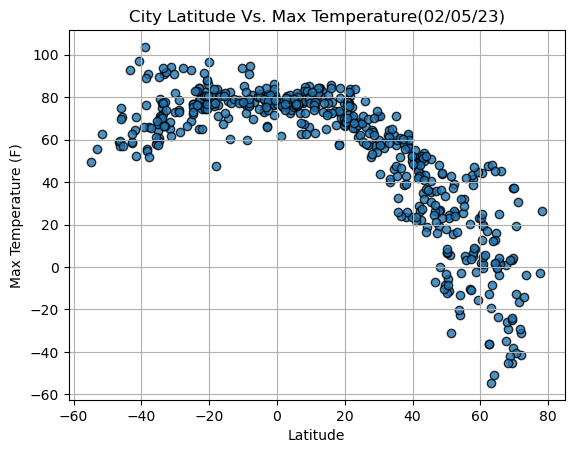

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

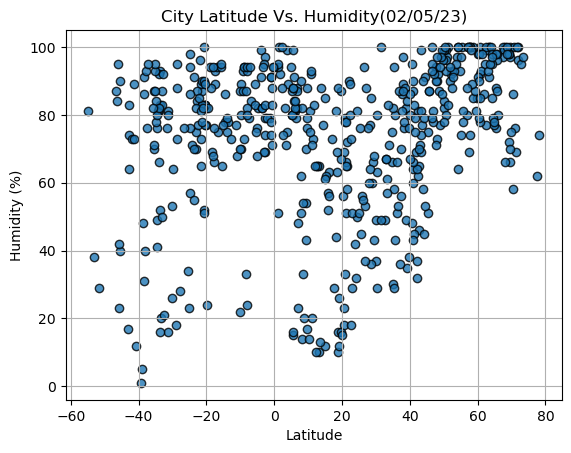

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

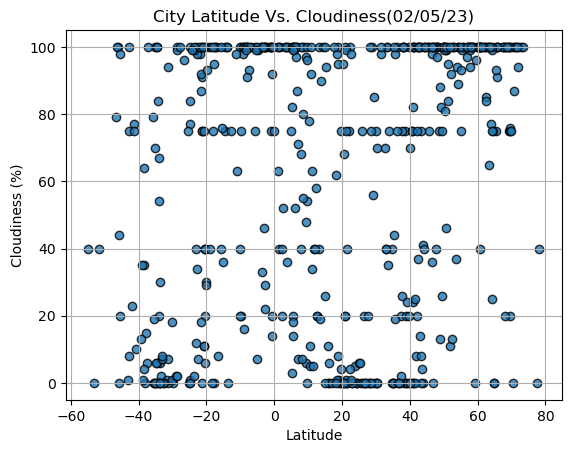

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

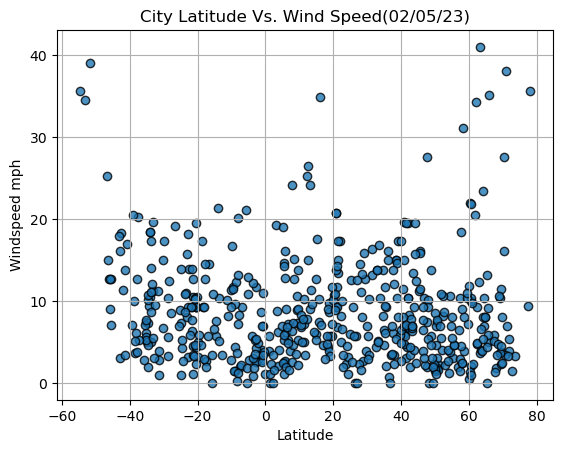

In [14]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gushikawa,26.3544,127.8686,65.79,94,20,0.00,JP,1675625126
2,bilibino,68.0546,166.4372,-29.42,100,100,1.86,RU,1675625127
3,iberia,29.9502,-91.7507,70.97,49,75,6.91,US,1675625127
4,shimoda,34.6667,138.9500,46.31,66,0,8.23,JP,1675625128
6,clyde river,70.4692,-68.5914,-12.77,58,100,16.11,CA,1675625129


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saquarema,-22.9200,-42.5103,84.34,84,34,3.18,BR,1675625126
5,kruisfontein,-34.0033,24.7314,74.88,81,54,10.51,ZA,1675625128
9,bluff,-46.6000,168.3333,58.80,87,79,25.23,NZ,1675625130
10,port alfred,-33.5906,26.8910,72.18,93,6,5.01,ZA,1675625086
13,avarua,-21.2078,-159.7750,82.45,83,75,12.66,CK,1675625096


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.864189958021554


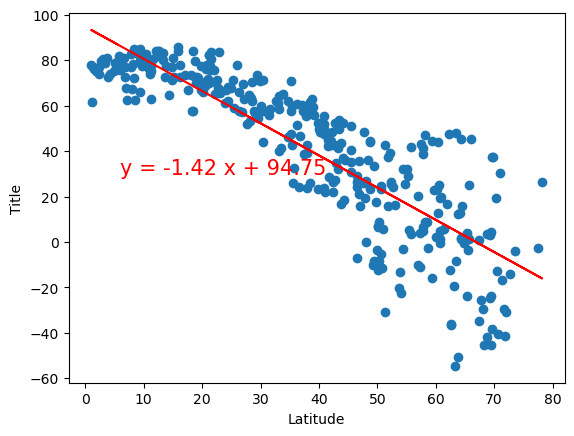

In [18]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.37513577543294424


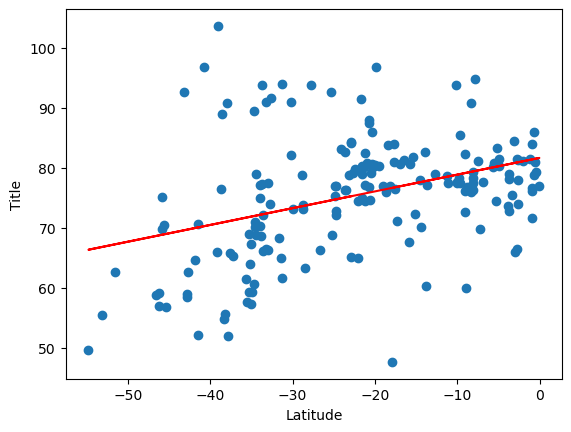

In [21]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.43320479270486056


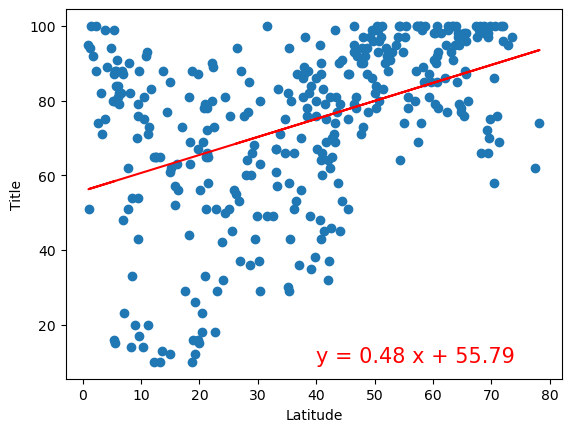

In [22]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.3246350275725836


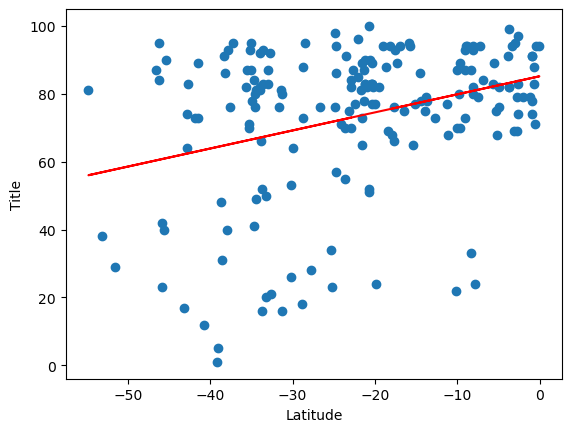

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.29302885305320164


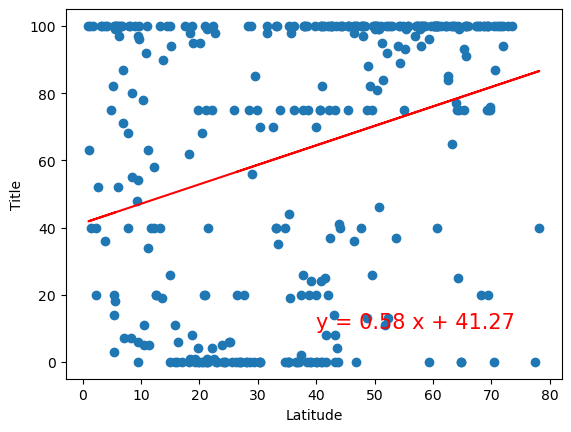

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.4125710426322681


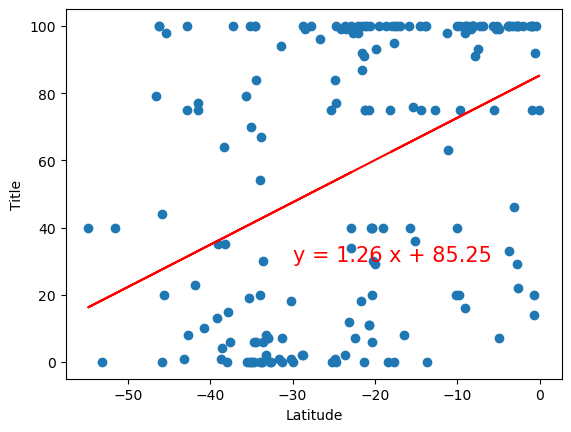

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.029994926487574094


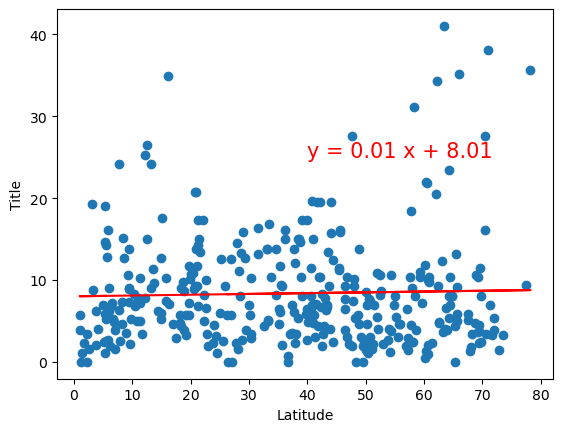

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ['Wind Speed']
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))


The r-squared is: -0.40267273488273453


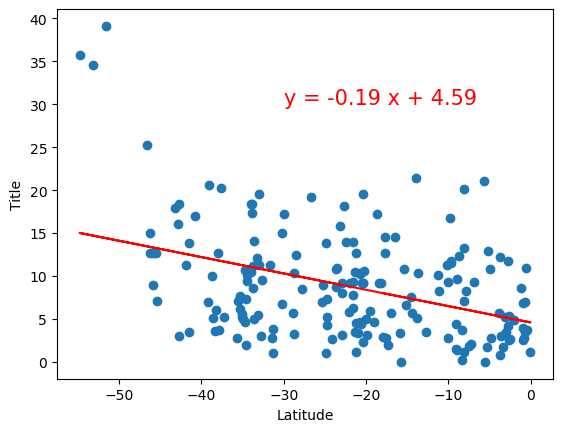

In [28]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE